In [73]:
import sbmlcore, pandas, numpy, pytest
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Easy case: PncA (3pl1)

One chain, no offsets, small structure

In [74]:
mutations = {'segid': ['A', 'A', 'A', 'A'], 'mutation': ['M1D','R2K', 'A3V', 'A3F']}
df = pandas.DataFrame.from_dict(mutations)
df

,segid,mutation
0,A,M1D
1,A,R2K
2,A,A3V
3,A,A3F


In [75]:
features = sbmlcore.FeatureDataset(df, species='M. tuberculosis', gene='pncA', protein='pncA')
features

species:          M. tuberculosis
gene name:        pncA
protein name:     pncA
number of rows:   4

  segid mutation
0     A      M1D
1     A      R2K
2     A      A3V

### Features from `AminoAcidProperties`: 
1. amino acid volume change
2. hydropathy/hydrophobicity scale changes: Kyte-Doolittle and Wimley-White
3. amino acid molecular weight changes
4. amino acid isoelectric point changes

In [76]:
a = sbmlcore.AminoAcidVolumeChange()
b1 = sbmlcore.AminoAcidHydropathyChangeKyteDoolittle()
b2 = sbmlcore.AminoAcidHydropathyChangeWimleyWhite()
c = sbmlcore.AminoAcidMWChange()
d = sbmlcore.AminoAcidPiChange()

features.add_feature([a, b1, b2, c, d])
features.df

,segid,mutation,d_volume,d_hydropathy_KD,d_hydropathy_WW,d_MW,d_Pi
0,A,M1D,-51.8,-5.4,2.85,-16.1,-2.97
1,A,R2K,-4.8,0.6,0.81,-28.0,-1.02
2,A,A3V,51.4,2.4,-0.86,28.0,-0.04
3,A,A3F,101.3,1.0,-0.91,76.1,-0.52


### Features from `ExternalCode`: 
1. STRIDE (secondary structure, phi, psi, SASA)
2. FreeSASA (another method to calculate SASA)
3. SNAP2 (predicts the likelihood of a change in protein function)

In [77]:
e = sbmlcore.Stride('tests/3pl1.pdb') #Offsets keyword (as a dictionary) optional
features.add_feature(e) #feature_name='all' works internally within class
features.df

,segid,mutation,d_volume,d_hydropathy_KD,d_hydropathy_WW,d_MW,d_Pi,secondary_structure,secondary_structure_long,phi,psi,residue_sasa,B,C,E,G,H,T
0,A,A3V,51.4,2.4,-0.86,28.0,-0.04,E,Strand,-126.53,153.85,0.0,0,0,1,0,0,0
1,A,A3F,101.3,1.0,-0.91,76.1,-0.52,E,Strand,-126.53,153.85,0.0,0,0,1,0,0,0
2,A,M1D,-51.8,-5.4,2.85,-16.1,-2.97,C,Coil,0.00,-35.20,86.2,0,1,0,0,0,0
3,A,R2K,-4.8,0.6,0.81,-28.0,-1.02,E,Strand,-117.94,133.99,54.7,0,0,1,0,0,0


In [78]:
f = sbmlcore.FreeSASA('tests/3pl1.pdb')
features.add_feature(f)
features.df

,segid,mutation,d_volume,d_hydropathy_KD,d_hydropathy_WW,d_MW,d_Pi,secondary_structure,secondary_structure_long,phi,psi,residue_sasa,B,C,E,G,H,T,SASA
0,A,M1D,-51.8,-5.4,2.85,-16.1,-2.97,C,Coil,0.00,-35.20,86.2,0,1,0,0,0,0,96.204428
1,A,R2K,-4.8,0.6,0.81,-28.0,-1.02,E,Strand,-117.94,133.99,54.7,0,0,1,0,0,0,57.391769
2,A,A3V,51.4,2.4,-0.86,28.0,-0.04,E,Strand,-126.53,153.85,0.0,0,0,1,0,0,0,0.000000
3,A,A3F,101.3,1.0,-0.91,76.1,-0.52,E,Strand,-126.53,153.85,0.0,0,0,1,0,0,0,0.000000


In [79]:
g = sbmlcore.SNAP2('tests/3pl1-complete.csv', offsets={'A':0}) #N.B. Offsets must be specified even if there aren't any!
features.add_feature(g)
features.df

,segid,mutation,d_volume,d_hydropathy_KD,d_hydropathy_WW,d_MW,d_Pi,secondary_structure,secondary_structure_long,phi,...,B,C,E,G,H,T,SASA,Predicted Effect,Score,Expected Accuracy
0,A,M1D,-51.8,-5.4,2.85,-16.1,-2.97,C,Coil,0.00,...,0,1,0,0,0,0,96.204428,effect,74,85%
1,A,R2K,-4.8,0.6,0.81,-28.0,-1.02,E,Strand,-117.94,...,0,0,1,0,0,0,57.391769,neutral,-88,93%
2,A,A3V,51.4,2.4,-0.86,28.0,-0.04,E,Strand,-126.53,...,0,0,1,0,0,0,0.000000,effect,26,63%
3,A,A3F,101.3,1.0,-0.91,76.1,-0.52,E,Strand,-126.53,...,0,0,1,0,0,0,0.000000,effect,59,75%


### Feature from `DeepDDG`: effect on protein stability as estimated by DeepDDG

In [80]:
h = sbmlcore.DeepDDG('tests/3pl1.ddg')
features.add_feature(h)
features.df

,segid,mutation,d_volume,d_hydropathy_KD,d_hydropathy_WW,d_MW,d_Pi,secondary_structure,secondary_structure_long,phi,...,C,E,G,H,T,SASA,Predicted Effect,Score,Expected Accuracy,deep_ddG
0,A,M1D,-51.8,-5.4,2.85,-16.1,-2.97,C,Coil,0.00,...,1,0,0,0,0,96.204428,effect,74,85%,-0.903
1,A,R2K,-4.8,0.6,0.81,-28.0,-1.02,E,Strand,-117.94,...,0,1,0,0,0,57.391769,neutral,-88,93%,-1.012
2,A,A3V,51.4,2.4,-0.86,28.0,-0.04,E,Strand,-126.53,...,0,1,0,0,0,0.000000,effect,26,63%,-1.446
3,A,A3F,101.3,1.0,-0.91,76.1,-0.52,E,Strand,-126.53,...,0,1,0,0,0,0.000000,effect,59,75%,-1.220


<AxesSubplot:>

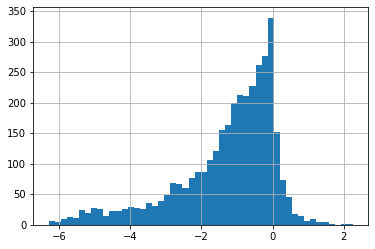

In [81]:
#Optional histogram plotting of DeepDDG results
h.results.deep_ddG.hist(bins=50)

### Features from `StructuralDistances`: distances (selected via MDAnalysis)

In [82]:
i = sbmlcore.StructuralDistances('tests/3pl1.pdb', distance_selection="resname FE2", distance_name='dist_FE')
features.add_feature(i)
features.df

,segid,mutation,d_volume,d_hydropathy_KD,d_hydropathy_WW,d_MW,d_Pi,secondary_structure,secondary_structure_long,phi,...,E,G,H,T,SASA,Predicted Effect,Score,Expected Accuracy,deep_ddG,dist_FE
0,A,M1D,-51.8,-5.4,2.85,-16.1,-2.97,C,Coil,0.00,...,0,0,0,0,96.204428,effect,74,85%,-0.903,29.948318
1,A,R2K,-4.8,0.6,0.81,-28.0,-1.02,E,Strand,-117.94,...,1,0,0,0,57.391769,neutral,-88,93%,-1.012,27.459823
2,A,A3V,51.4,2.4,-0.86,28.0,-0.04,E,Strand,-126.53,...,1,0,0,0,0.000000,effect,26,63%,-1.446,24.149025
3,A,A3F,101.3,1.0,-0.91,76.1,-0.52,E,Strand,-126.53,...,1,0,0,0,0.000000,effect,59,75%,-1.220,24.149025


### Features from `TrajectoryDistances` - IN DEVELOPMENT!

In [52]:
a = sbmlcore.TrajectoryDistances('tests/rpob-5uh6-3-warm.gro.gz', ['tests/rpob-5uh6-3-md-1-50ns-dt10ns-nojump.xtc'], 'resname RFP', 'dRIF')

[70.63777634 71.33223904 74.58824203 ... 48.9140271  48.59965847
 46.0846648 ]


In [ ]:
a

In [39]:
p = numpy.array([[1,2,3]])
q = numpy.array([[4,5,6]])

z = numpy.concatenate([p,q])


In [47]:
for i in range(z.shape[1]):
    print(i, z[:,i])

0 [1 4]
1 [2 5]
2 [3 6]


In [44]:
z[:,2]

array([3, 6])

In [51]:
numpy.percentile(z, 10, axis=0)

array([1.3, 2.3, 3.3])

## 2. Hard case: RNA polymerase (5uh6)

Multiple chains, some require offsets, large protein, not all resolved in PDB

In [83]:
mutations2 = {'segid': ['A', 'A', 'B', 'B', 'C', 'C', 'C', 'D', 'D', 'E', 'F', 'F'], 'mutation': ['I3F','Q5T', 'S10Q', 'S4V', 'S450L', 'H445D', 'I491F', 'I491V', 'G594E', 'A101E', 'E245D', 'A3W']}
df2 = pandas.DataFrame.from_dict(mutations2)
df2

,segid,mutation
0,A,I3F
1,A,Q5T
2,B,S10Q
3,B,S4V
4,C,S450L
5,C,H445D
6,C,I491F
7,D,I491V
8,D,G594E
9,E,A101E


In [84]:
features2 = sbmlcore.FeatureDataset(df2, species='M. tuberculosis', protein='RNAP')
features2

species:          M. tuberculosis
protein name:     RNAP
number of rows:   12

  segid mutation
0     A      I3F
1     A      Q5T
2     B     S10Q

### Adding features
Note chain C (rpoB) requires an offset.

In [85]:
a2 = sbmlcore.AminoAcidVolumeChange()
b3 = sbmlcore.AminoAcidHydropathyChangeKyteDoolittle()
b4 = sbmlcore.AminoAcidHydropathyChangeWimleyWhite()
c2 = sbmlcore.AminoAcidMWChange()
d2 = sbmlcore.AminoAcidPiChange()
e2 = sbmlcore.Stride('tests/5uh6-protein-chains.pdb' , offsets = {'A': 0, 'B': 0, 'C':-6, 'D':0, 'E':0, 'F':0})
f2 = sbmlcore.FreeSASA('tests/5uh6.pdb', offsets = {'A': 0, 'B': 0, 'C': -6, 'D':0, 'E':0, 'F':0})
g2 = sbmlcore.SNAP2("tests/5uh6-complete.csv", offsets = {'A': 0, 'B': 0, 'C': -6, 'D':0, 'E':0, 'F':0})
h2 = sbmlcore.DeepDDG('tests/5uh6-protein-chains.ddg' , offsets = {'A': 0, 'B': 0, 'C':-6, 'D':0, 'E':0, 'F':0})
i2 = sbmlcore.StructuralDistances('tests/5uh6.pdb', distance_selection="resname RFP", distance_name="dist_RFP")

In [86]:
features2.add_feature([a2, b3, b4, c2, d2, e2, f2, g2, h2, i2])
features2.df

,segid,mutation,d_volume,d_hydropathy_KD,d_hydropathy_WW,d_MW,d_Pi,secondary_structure,secondary_structure_long,phi,...,E,G,H,T,SASA,Predicted Effect,Score,Expected Accuracy,deep_ddG,dist_RFP
0,E,A101E,49.8,-5.3,1.28,58.0,-2.78,H,AlphaHelix,-89.66,...,0.0,0.0,1.0,0.0,44.073359,neutral,-50,72%,0.089,61.869629
1,F,A3W,139.2,-2.7,-0.57,115.1,-0.11,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,neutral,-6,53%,NaN,NaN
2,F,E245D,-27.3,0.0,0.80,-14.0,-0.45,H,AlphaHelix,-62.01,...,0.0,0.0,1.0,0.0,83.879319,neutral,-26,61%,-0.429,66.873919
3,D,G594E,78.3,-3.1,0.47,72.0,-2.75,T,Turn,-90.49,...,0.0,0.0,0.0,1.0,71.120900,neutral,-26,61%,-0.117,61.428515
4,C,H445D,-42.1,-0.3,1.04,-22.1,-4.82,H,AlphaHelix,-66.73,...,0.0,0.0,1.0,0.0,6.609119,effect,93,95%,-2.352,NaN
5,A,I3F,23.2,-1.7,0.23,34.0,-0.54,C,Coil,0.00,...,0.0,0.0,0.0,0.0,50.869281,neutral,-63,82%,-0.426,76.681586
6,C,I491F,23.2,-1.7,0.23,34.0,-0.54,E,Strand,-132.44,...,1.0,0.0,0.0,0.0,23.313273,effect,63,80%,-1.740,NaN
7,D,I491V,-26.7,-0.3,0.28,-14.1,-0.06,H,AlphaHelix,-81.97,...,0.0,0.0,1.0,0.0,5.937352,neutral,-62,82%,-1.141,41.837899
8,A,Q5T,-27.7,2.8,-0.08,-27.1,-0.05,C,Coil,-129.03,...,0.0,0.0,0.0,0.0,123.631715,neutral,-22,61%,-0.246,76.589376
9,C,S450L,77.7,4.6,-1.02,26.1,0.30,E,Strand,-111.35,...,1.0,0.0,0.0,0.0,8.757060,effect,92,95%,-0.962,NaN


<AxesSubplot:>

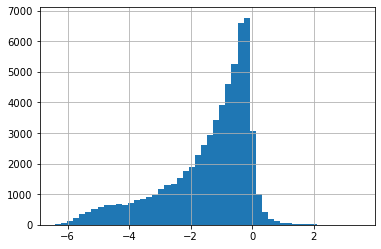

In [87]:
h2.results.deep_ddG.hist(bins=50)